In [1]:
from dataset.dataset import get_Dataloader
from main import get_parameters

config = get_parameters().parse_args([])
_, test_dataloader, _ = get_Dataloader(config)


This is not a dir: /workspace/data/lgg-mri-segmentation/kaggle_3m/data.csv
This is not a dir: /workspace/data/lgg-mri-segmentation/kaggle_3m/README.md
path to the image: /workspace/data/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6186_20000601/TCGA_CS_6186_20000601_18.tif
path to the mask: /workspace/data/lgg-mri-segmentation/kaggle_3m/TCGA_CS_6186_20000601/TCGA_CS_6186_20000601_18_mask.tif
Train: (3005, 4) 
Val: (393, 4) 
Test: (531, 4)


In [2]:
# from models.U_Net import UNet
from models.UNet import UNet
from utils.utils import tensor2var
import torch
import numpy as np


# unet = UNet(1).cuda()
unet = UNet().cuda()

checkpoint = torch.load("checkpoint/220506/129.pth.tar")
unet.load_state_dict(checkpoint['state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']


In [3]:
# image 
for i, (data, label) in enumerate(test_dataloader):

    unet.eval()

    data = tensor2var(data)
    label = tensor2var(label)

    with torch.no_grad():
        pred = unet(data)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

    ax[0, 0].imshow(data[0].cpu().numpy().transpose(1,2,0))
    ax[0, 0].set_title("image")
    ax[0, 1].imshow(label[0].cpu().numpy().transpose(1,2,0))
    ax[0, 1].set_title("mask")
    ax[1, 0].imshow(pred[0].cpu().numpy().transpose(1,2,0))
    ax[1, 0].set_title("prediction")
    plt.show()
    break

NameError: name 'plt' is not defined

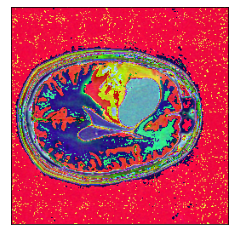

In [ ]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path


grid = make_grid(data[0], label[0], pred[0])
show(grid)

In [4]:
import torchvision.transforms.functional as F

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


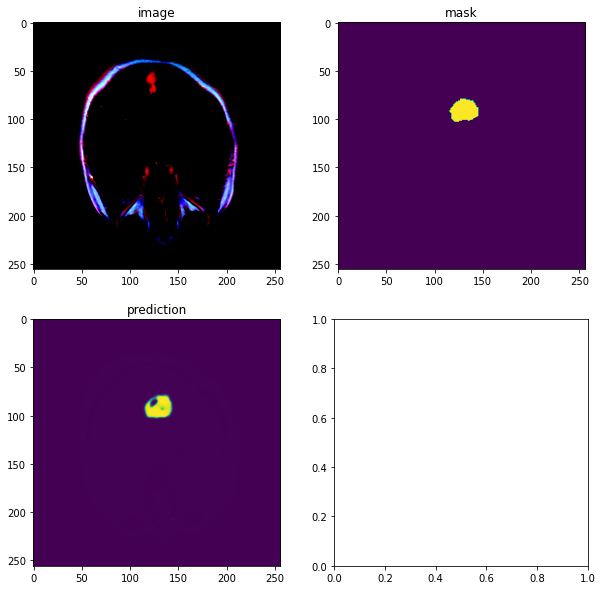

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0, 0].imshow(data[0].cpu().numpy().transpose(1,2,0))
ax[0, 0].set_title("image")
ax[0, 1].imshow(label[0].cpu().numpy().transpose(1,2,0))
ax[0, 1].set_title("mask")
ax[1, 0].imshow(pred[0].cpu().numpy().transpose(1,2,0))
ax[1, 0].set_title("prediction")
plt.show()